<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 9: Order Statistics & Histogram Equalization​

## Preliminaries

Run the cell below to download the class pack.

In [23]:
import gdown

gdown.download(id='158ovwFzNgmaR01NEU1oZl8hLu6Z6Qtnd')

!unzip -o '09.zip'
!rm '09.zip'

Downloading...
From: https://drive.google.com/uc?id=158ovwFzNgmaR01NEU1oZl8hLu6Z6Qtnd
To: /content/09.zip
100%|██████████| 3.32M/3.32M [00:00<00:00, 131MB/s]

Archive:  09.zip
  inflating: atletica-5.png          
  inflating: atletica-10.png         
  inflating: atletica-25.png         
  inflating: atletica-50.png         
  inflating: bay.png                 
  inflating: consulting-5.png        
  inflating: consulting-10.png       
  inflating: consulting-25.png       
  inflating: consulting-50.png       
  inflating: harvard-5.png           
  inflating: harvard-10.png          
  inflating: harvard-25.png          
  inflating: harvard-50.png          
  inflating: informatica-5.png       
  inflating: informatica-10.png      
  inflating: informatica-25.png      
  inflating: informatica-50.png      
  inflating: insper-5.png            
  inflating: insper-10.png           
  inflating: insper-25.png           
  inflating: insper-50.png           
  inflating: sdx.py                  
  inflating: smash-5.png             
  inflating: smash-10.png            
  inflating: smash-25.png            
  inflating: smash-50.png        

Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [84]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from sdx import *

## Part 1: histogram equalization

### Loading the example image

This is the same image we used for dithering, but with much worse contrast.

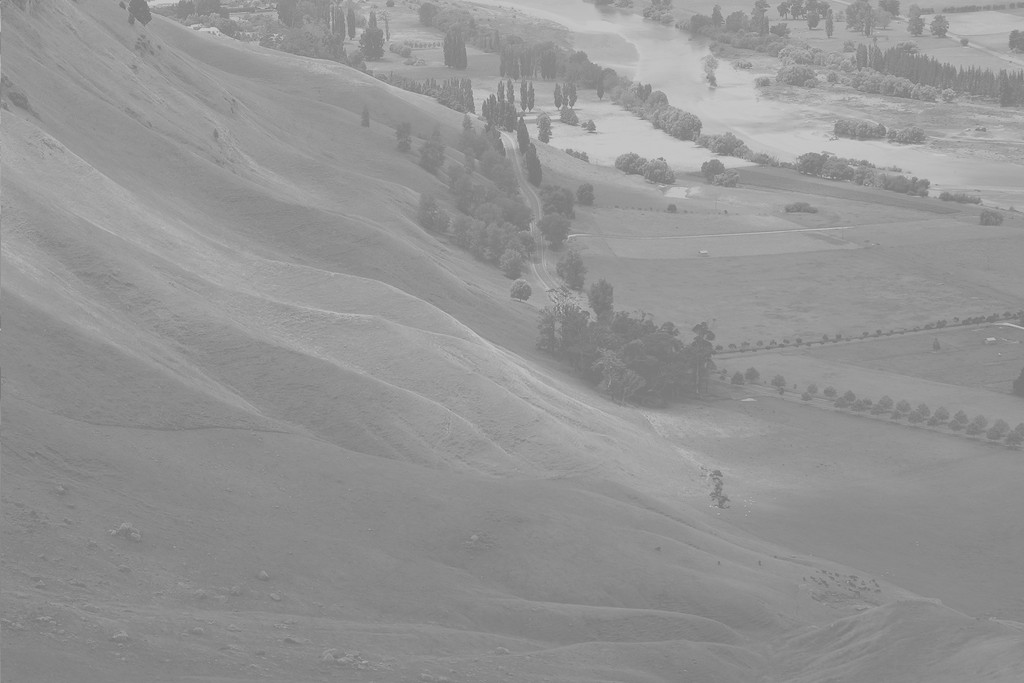

In [85]:
image = cv_grayread('bay.png')

height, width = image.shape

cv_imshow(image)

### Calculating the gray level histogram

We can simply call the `np.histogram` function to count, for each possible gray level, how many pixels have such level.

The second returned value is ignored because it is simply the bin edges, and we obviously know what they are.

The `density=True` parameter normalizes the values by the sum, which is equal to `height * width`.

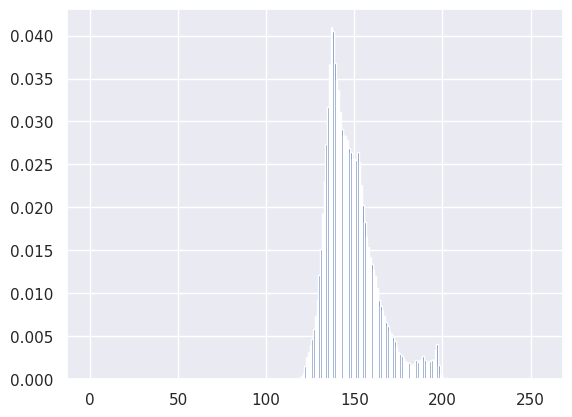

In [86]:
h, _ = np.histogram(image, bins=256, range=(0, 256), density=True)

plt.bar(range(0, 256), h);

### Activity 1: cumulative histogram

Let $h$ be the histogram above. *(that is, $h(i)$ is the normalized count of level $i$, where $i = 0, 1, 2, \ldots, 253, 254, 255$)*

As efficiently as possible, calculate $h_c$ such that $h_c(i) = \sum^{255}_{i = 0} h(i)$.

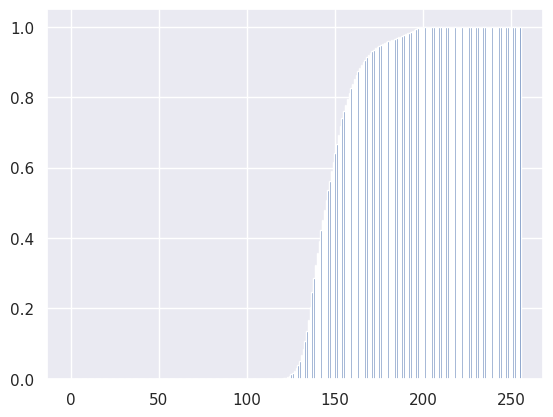

In [87]:
hc = np.cumsum(h)

# hc = [sum(h[:i + 1]) for i in range(len(h))] # jeito de fazer com list compreenhiton

plt.bar(range(0, 256), hc);

### Activity 2: histogram equalization

Write a code such that, for each level $i$, the color of the output image is derived from $h_c(i)$.

Notice that $h_c(i)$ is between $0$ and $1$. You will need to map this to the original range.

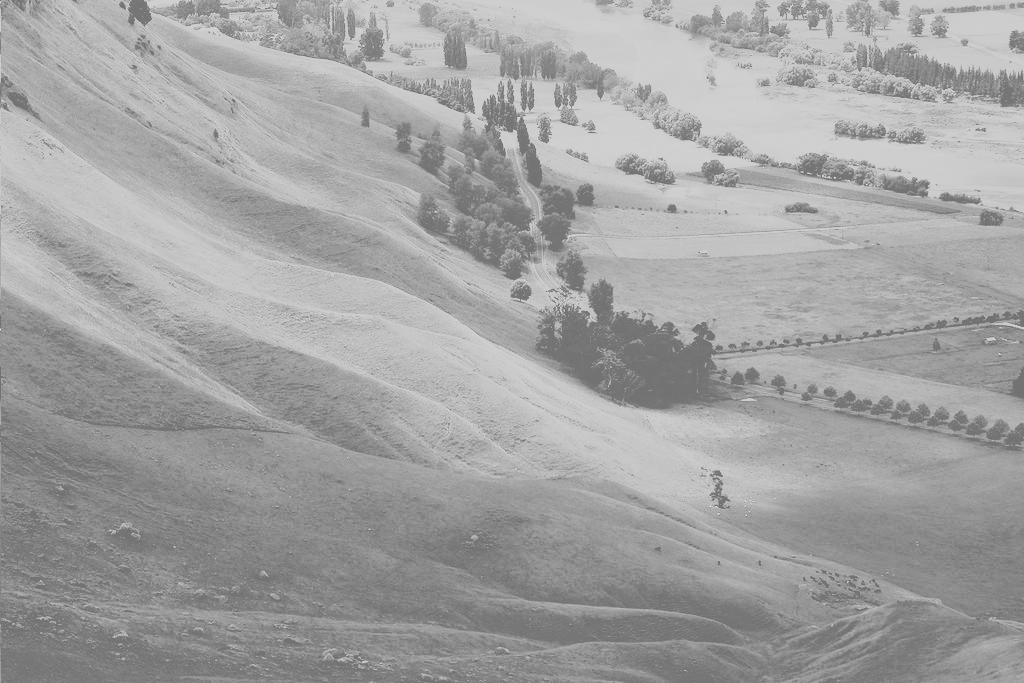

In [92]:
output_image = np.empty((height, width))

max_val = np.max(image)
min_val = np.min(image)

for y in range(height):
  for x in range(width):
    level = image[y, x]
    # output_image[y, x] = np.round(np.multiply(hc[level], 255), 0)
    equalized_level = hc[level]
    scaled_level = np.round(equalized_level * (max_val - min_val) + min_val, 0)
    output_image[y, x] = scaled_level

cv_imshow(output_image)

If your code is correct, the cumulative histogram should now be an approximation of a linear function.

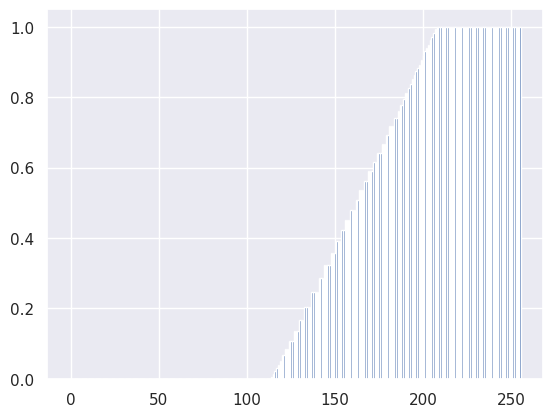

In [93]:
h, _ = np.histogram(output_image, bins=256, range=(0, 256), density=True)

hc = np.cumsum(h)

plt.bar(range(0, 256), hc);

## Part 2: order statistics

### Loading a specific image

The idea of this section is running the same code for different images.

By changing the two parameters below, you have 6x3=18 images to choose.

Possible values of `NAME`: `atletica`, `consulting`, `smash`, `insper`, `harvard`, `informatica`

In [74]:
NAME = 'informatica'

Possible values of `LEVEL`: `5`, `10`, `25`, `50`

In [75]:
LEVEL = 5

The cell below loads the chosen image and converts it to gray.

Play a bit with the two parameters to see the differences between the images.

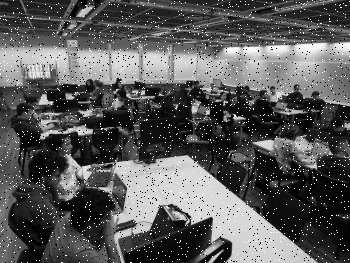

In [76]:
image = cv_grayread(f'{NAME}-{LEVEL}.png')

cv_imshow(image)

### Performing an average blur

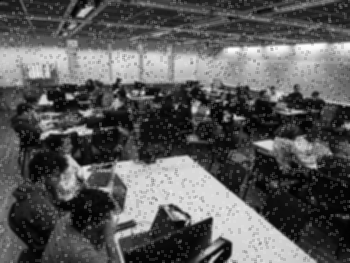

In [77]:
output_image = cv.blur(image, (3, 3))

cv_imshow(output_image)

### Performing a Gaussian blur

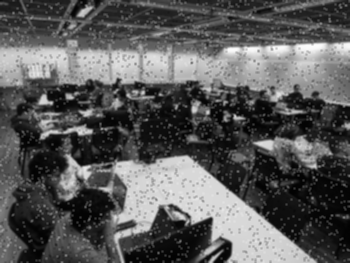

In [78]:
output_image = cv.GaussianBlur(image, (3, 3), 1)

cv_imshow(output_image)

### Activity 3: median filter

As efficiently as possible (but not using OpenCV functions, obviously), adapt the idea of the average blur to use the **median** of the pixels instead of the mean. Let `n` be the size of the neighborhood.

In [80]:
def median_blur(image, n):
  rois = np.lib.stride_tricks.sliding_window_view(image, (n, n))
  return np.median(rois, axis=(2, 3))

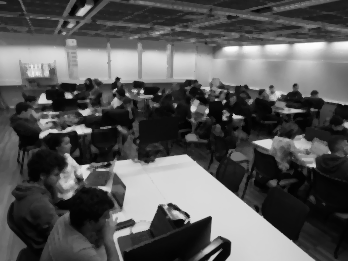

In [81]:
output_image = median_blur(image,n)

cv_imshow(output_image)

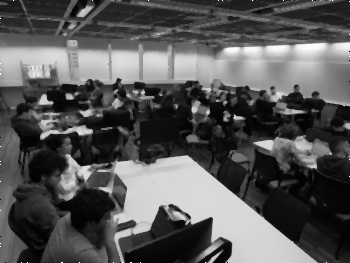

In [83]:
n = 3

def median_blur(image, n):
    final_image = image.copy()
    height, width = final_image.shape

    for i in range(n // 2, height - n // 2):
        for j in range(n // 2, width - n // 2):
            roi = image[i - n // 2:i + n // 2 + 1, j - n // 2:j + n // 2 + 1]
            final_image[i, j] = np.median(roi)

    return final_image

output_image = median_blur(image,n)

cv_imshow(output_image)

Test your code for different images.

You can click on the toc.png tab to the left to browse by section.